## Regression Project - House Price Prediction

Using Regression Models going to Predict House Prices of Mumbai

Dataset --> Mumbai_House_Prices.csv (Taken From Kaggle) (June 2021 to July 2021)

#### Dataset Description
price--> Price of the house in (INR) 

Address--> Location of the house

area--> area of the house in sqft

latitude--> No Description

longitude--> No Description

Bedrooms --> Number of bedrooms.

Bathrooms --> Number of Bathrooms

Balcony --> Number of Balconys

Status --> Is the house ready to move or under construction.

neworold --> house is for resale or new

parking --> Number of Parking

Furnished_status --> Status of Furnished

Lift --> Number of Lifts

Landmarks --> Landmarks Names

Type_of_Buliding --> Flat / Room

desc --> Small Description of House

Price_sqft --> Price Per Sqft

In [1]:
# Importing the Required Labaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 

#For Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

#### Load the Dataset

In [2]:
#Loading The Dataset
df1 = pd.read_csv("C:/Users/Akaash/Downloads/Mumbai_House_Prices.csv")
df1.head(3)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,19.0328,72.896357,2.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,19.0328,72.896357,3.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,19.0856,72.909277,3.0,3.0,NaN,Under Construction,New Property,1.0,NaN,2.0,NaN,Flat,\n \n \n...,32747.933884


In [3]:
#Checking the shape of Dataset
df1.shape

(6255, 17)

Inference: We have 6255 rows & 17 columns.

#### Drop features that are not required to build our model

Based on My Assumption 

In [4]:
df2 = df1.drop(['latitude','longitude','Landmarks','desc'],axis='columns')
df2.shape

(6255, 13)

In [5]:
#Checking Value Counts of "Status" column
df2['Status'].value_counts()

Ready to Move         5771
Under Construction       3
Name: Status, dtype: int64

Inference: As there is very less variance in the "Status" column so will drop it

In [6]:
#Dropping "Status" column
df2 = df2.drop(['Status'],axis='columns')
df2.shape

(6255, 12)

#### Data Imputation: Handle NA values

In [7]:
# checking NA Values
df2.isnull().sum()

price                  0
Address                0
area                   0
Bedrooms               0
Bathrooms              0
Balcony             3879
neworold               0
parking             4126
Furnished_status    2655
Lift                4577
type_of_building       0
Price_sqft             0
dtype: int64

Inference: Will Impute NA Values of Columns "Balcony","parking","Furnished_status","Lift" by using Data Science Concept & some Logic of Estate 

#### Imputing "Balcony" Feature

In [8]:
# Checking Value Count
df2['Balcony'].value_counts()

1.0    949
2.0    583
3.0    468
4.0    297
5.0     56
6.0     12
7.0      8
8.0      3
Name: Balcony, dtype: int64

Inference: In Most Cases Number of Balcony Depends Number of Bedrooms,like if a house has 3 or more bedrooms then for sure it will have 3 balcony & if less then 3 bedrooms like 2 bedrooms then 2 balcony 
#### Note: But In Our Dataset Most Houses have 1 or 2 balcony so if bedroom >= 3 then 2 balcony else 1 balcony (Will impute using this logic)


In [9]:
#Condition
Cond = df2['Bedrooms'] >= 3
#Imputing NA for Balcony
df2['Balcony'] = df2['Balcony'].fillna(Cond.map({True:2,False:1}))

#### Imputing "parking" Feature

In [10]:
# Checking Value Count
df2['parking'].value_counts()

1.0      1421
2.0       509
3.0        87
4.0        33
5.0         9
10.0        9
20.0        5
12.0        4
18.0        3
30.0        3
6.0         3
14.0        2
15.0        2
9.0         2
401.0       2
7.0         2
40.0        2
205.0       2
105.0       2
11.0        2
104.0       2
65.0        1
24.0        1
601.0       1
22.0        1
60.0        1
26.0        1
801.0       1
102.0       1
302.0       1
125.0       1
163.0       1
418.0       1
101.0       1
21.0        1
702.0       1
55.0        1
202.0       1
150.0       1
185.0       1
75.0        1
603.0       1
8.0         1
16.0        1
Name: parking, dtype: int64

Inference: Will Assume More then 5 parking are outliers will handle them in the later stage.
    
In our Dataset Most Houses have 1 parking facility so will go will this logic

In [11]:
#To fill NA value of "parking" with its most occuring value 1
df2['parking'] = df2['parking'].fillna(1.0)

#### Imputing "Furnished_status" Feature

In [12]:
# Checking Value Count
df2['Furnished_status'].value_counts()

Unfurnished       1384
Semi-Furnished    1195
Furnished         1021
Name: Furnished_status, dtype: int64

Inference: As it is categorial column will take mode 

In [13]:
#Missing value imputation for categorical vlaue
df2['Furnished_status']=df2['Furnished_status'].fillna(df2['Furnished_status'].mode().iloc[0])


#### Imputing "Lift" Feature

In [14]:
# Checking Value Count
df2['Lift'].value_counts()

2.0     758
1.0     327
3.0     220
4.0     174
0.0      55
5.0      51
6.0      49
7.0      18
8.0      11
10.0     11
9.0       4
Name: Lift, dtype: int64

Inference: Lift More then 6 are mostly outliers will handle them later

In Most Building / Houses there are 2 Lift only,Also the Dataset says the Same will use this logic to impute

In [15]:
#To fill NA value of "parking" with its most occuring value 1
df2['Lift'] = df2['Lift'].fillna(2.0)

In [16]:
#Checking NA Values after Imputation
df2.isnull().sum()

price               0
Address             0
area                0
Bedrooms            0
Bathrooms           0
Balcony             0
neworold            0
parking             0
Furnished_status    0
Lift                0
type_of_building    0
Price_sqft          0
dtype: int64

Inference: There are No NA Values Now.

In [17]:
#Saving the DataFrame into Excel
#df2.to_csv("C:/Users/Akaash/Downloads/Mumbai_house_prices_cleaned.csv")

#### Feature Engineering
"Address","neworold","Furnished","type_of_building" are Categorial variable,So when I will apply dummies on them it will cause "Curse of Dimensionality" Effect, Thatwhy I need to apply some Dimensionality Reduction Technique Based on Some Creteria to Reduce the number of Catergory in these column/Variable

#### Address column feature Engineering

Save the Dataframe into excel, then for Address Column

using find & replace In Excel

First remove the "," with " ".

Also "-" from no dash in Furnished_status

In [18]:
#Now Loading the Dataset (for Address Handled)
df3 = pd.read_csv("C:/Users/Akaash/Downloads/Mumbai_house_prices_cleaned.csv")
df3.head(3)

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
0,0,22400000,Chembur Mumbai Harbour Line Maharashtra,629,2,2,1,New Property,1,Unfurnished,2,Flat,35612.08267
1,1,35000000,Chembur Mumbai Harbour Line Maharashtra,974,3,2,2,New Property,1,Unfurnished,2,Flat,35934.29158
2,2,31700000,Ghatkopar East Mumbai Central Line Maharas...,968,3,3,2,New Property,1,Unfurnished,2,Flat,32747.93388


In [19]:
#Getting the Most Common Occuring Words - Using TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
Address_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,1), max_features = 100)
Address_max_matrix = Address_max_features.fit_transform(df3['Address'])
#Getting Feature Names
Address_list = Address_max_features.get_feature_names()
print(Address_list)

['and', 'andheri', 'apartment', 'around', 'bandra', 'behind', 'beyond', 'bhandup', 'bhayandar', 'bldg', 'borivali', 'building', 'central', 'chandivali', 'charkop', 'chembur', 'chs', 'city', 'colony', 'complex', 'cooperative', 'dadar', 'dahisar', 'dombivli', 'east', 'estate', 'flat', 'floor', 'garden', 'ghatkopar', 'gorai', 'goregaon', 'harbour', 'hill', 'housing', 'india', 'jogeshwari', 'juhu', 'kalyan', 'kandivali', 'kanjurmarg', 'khar', 'kurla', 'lane', 'lbs', 'line', 'link', 'lokhandwala', 'ltd', 'maharashtra', 'mahim', 'malad', 'marg', 'marol', 'matunga', 'mira', 'mulund', 'mumbai', 'nagar', 'nalasopara', 'near', 'new', 'no', 'north', 'number', 'off', 'opp', 'parel', 'park', 'parle', 'plot', 'powai', 'prabhadevi', 'rd', 'road', 'santacruz', 'school', 'sector', 'sion', 'society', 'south', 'station', 'suburbs', 'thakur', 'thane', 'tilak', 'to', 'tower', 'ulhasnagar', 'vasai', 'versova', 'vikhroli', 'vile', 'village', 'virar', 'wadala', 'west', 'western', 'wing', 'worli']


In [20]:
#Remove / Unwanted (Stopwords)
Remove = ['and','apartment','around','behind','beyond','bldg','building','chs','city','colony','complex','cooperative','east',
          'estate','flat','floor','garden','hill','housing','india','lane','lbs','line','link','ltd','maharashtra','marg',
          'nagar','near','new','no','north','number','off','opp','park','plot','rd','road','school','sector','society','south',
          'station','tilak','to','tower','village','west','western','wing','central','harbour','suburbs']
#This For Loop will Remove all the stopwords
Location = []
for x in Address_list:
    if x not in Remove:
        Location.append(x)

In [21]:
#Function to Get the Location Names From the Address Column
match = []
def match_words(text, search):
    lower = [x.lower() for x in text]

    for temp in lower:
        f_text = temp.split()
        found = False
        for text_word in f_text:
            for search_word in search:
                if search_word == text_word:
                    match.append(search_word)
                    found = True
                    break

            if (found): break
                
#Calling the Function
match_words(df3['Address'],Location)

In [22]:
print('Total No of Location Matched =',len(match))
print('Total No of Original Address =',len(df3['Address']))

Total No of Location Matched = 6255
Total No of Original Address = 6255


Inference: All the Address Has been Matched with a Location name which was obtained using TFIDF Vectorizer, now will convert this Matched_list to Dataframe & Concat it with the original Dataset

In [23]:
#Converting the List of Match Location into Dataframe
Loc = pd.DataFrame(match,columns = ["Location"])
Loc.head()

,Location
0,chembur
1,chembur
2,ghatkopar
3,goregaon
4,malad


In [24]:
#Concat the Location Dataframe with orginal Dataset's DataFrame
df4 = pd.concat([df3,Loc],axis = 'columns')
df4.head(2)

,Unnamed: 0,price,Address,area,Bedrooms,Bathrooms,Balcony,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location
0,0,22400000,Chembur Mumbai Harbour Line Maharashtra,629,2,2,1,New Property,1,Unfurnished,2,Flat,35612.08267,chembur
1,1,35000000,Chembur Mumbai Harbour Line Maharashtra,974,3,2,2,New Property,1,Unfurnished,2,Flat,35934.29158,chembur


Inference: Location Matches With the Address, will Dropped the unnamed & Actual "Address" column Now

In [25]:
#Dropping Columns
df4 = df4.iloc[:,1:]
df5 = df4.drop(['Address'],axis='columns')
df5.shape

(6255, 12)

In [26]:
#Checking the Count of Each Values of the Location
Location = df5['Location'].value_counts(ascending=False)
Location

mumbai         1054
andheri         520
mira            398
goregaon        305
kandivali       298
malad           293
mulund          289
borivali        240
chembur         227
virar           202
ghatkopar       199
vasai           138
santacruz       131
bhandup         125
bandra          103
vile            103
powai           100
dahisar          92
parel            91
worli            81
sion             74
wadala           69
charkop          68
thane            65
juhu             65
kanjurmarg       63
bhayandar        61
kurla            60
kalyan           58
dadar            57
marol            54
thakur           53
khar             53
lokhandwala      52
chandivali       51
jogeshwari       46
vikhroli         45
nalasopara       41
mahim            40
ulhasnagar       40
matunga          39
gorai            36
prabhadevi       35
versova          35
dombivli          6
Name: Location, dtype: int64

In [27]:
#Count of Original location
len(df5.Location.unique())

45

#### Outlier Removal Using Business Logic

#### For parking column 

In this Dataset parking column records are very wrong im guessing as it ranges from 1.0 to 800. i dont understand what this means actually, so as per business logic most building / society has atmost 5 parking, so will then 5 parking as Outliers

In [28]:
#Original shape Before Outlier removal
df5.shape

(6255, 12)

In [29]:
# Parking More then 5
len(df5[df5.parking>5.0])

70

Inference: There are 70 records with parking more then 5.0 so will remove them

In [30]:
#Removing Outliers of Parking
df6 = df5[~(df5.parking>5.0)]
df6.shape

(6185, 12)

#### For Lift column
In this Dataset Lift column has value for Lift Ranges from 1 to 10, but in general / business logic is it very odds to have more then 6 lift in mumbai or any building, so Lift more then 6 are outliers

In [31]:
len(df6[df6.Lift>6])

43

Inference: There are 43 records with Lift more then 6 so will remove them

In [32]:
#Removing Outliers of Lift
df7 = df6[~(df6.Lift>6)]
df7.shape

(6142, 12)

#### For Bedrooms column
normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [33]:
len(df7[df7.area/df7.Bedrooms<300])

261

Inference: There are 261 records with area less then 300 sqft per Bedrooms, So will remove them


In [34]:
#Removing Outliers of Bedrooms
df8 = df7[~(df7.area/df7.Bedrooms<300)]
df8.shape

(5881, 12)

#### For Bathroom column
Let Check the Value Counts For it

In [35]:
# Checking Value Count
df8['Bathrooms'].value_counts()

2    4066
3    1316
4     364
5     102
6      26
7       5
0       1
8       1
Name: Bathrooms, dtype: int64

In [36]:
#Checking the Datapoint 
df8[df8.Bathrooms == 0]

,price,area,Bedrooms,Bathrooms,Balcony,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Location
3021,12000000,812,2,0,1,Resale,1,Unfurnished,2,Flat,14778.32512,mumbai


Inference: All other datapoints are okay for business logic only this datapoint has 0 bathrooms that is clearly an outlier, so will remove it

In [37]:
#Removing Outliers of Bedrooms
df9 = df8[~(df8.Bathrooms == 0)]
df9.shape

(5880, 12)

#### Outlier Removal Using Standard Deviation and Mean

In [38]:
# Price_sqft column Descriptive stats
df9.Price_sqft.describe()

count      5880.000000
mean      21344.227188
std       12679.441625
min        1500.000000
25%       13703.579915
50%       19230.769230
75%       26354.422603
max      119047.619000
Name: Price_sqft, dtype: float64

Inference: Here we find that min price_sqft is 1500 rs/sqft whereas max is 119047, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [39]:
#Function to remove outliers based on Price_sqft
def remove_ps_outliers(df):
    df_out = pd.DataFrame()
    for x, y in df.groupby('Location'):
        m = np.mean(y.Price_sqft)
        st = np.std(y.Price_sqft)
        reduced_df = y[(y.Price_sqft>(m-st)) & (y.Price_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df10 = remove_ps_outliers(df9)
df10.shape

(4434, 12)

#### Outlier Removal
Now we can remove those 3 BHK apartments whose price_sqft is less than mean price_sqft of 2 BHK apartment

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_sqft),
                'std': np.std(bhk_df.Price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>10:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df11 = remove_bhk_outliers(df10)
df11.shape

(3808, 12)

Inference: Now Dropping Price_sqft column as it is not required for our model building

In [41]:
#Dropping the Price_sqft column 
df12 = df11.drop(['Price_sqft'],axis='columns')
df12.shape

(3808, 11)

#### Final Dataset After EDA

In [42]:
# Dataset After EDA
df12.head()

,price,area,Bedrooms,Bathrooms,Balcony,neworold,parking,Furnished_status,Lift,type_of_building,Location
0,23900000,950,2,2,1,Resale,1,Furnished,2,Flat,andheri
1,25000000,900,2,2,1,Resale,2,Furnished,2,Flat,andheri
2,34000000,1355,3,3,1,Resale,1,Unfurnished,3,Flat,andheri
3,55000000,1866,4,6,1,New Property,2,Unfurnished,3,Flat,andheri
5,33500000,1450,3,3,2,New Property,1,Semi Furnished,2,Flat,andheri


#### Detecting Collinearity 
Correlation Matrix -- using this method to get a overlook of collinearity present in the dataset

In [43]:
#corr()
df12.corr()

,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift
price,1.000000,0.822005,0.670577,0.665678,0.176235,0.321138,0.129730
area,0.822005,1.000000,0.768449,0.734263,0.287006,0.344925,0.170101
Bedrooms,0.670577,0.768449,1.000000,0.833753,0.312656,0.333068,0.097397
Bathrooms,0.665678,0.734263,0.833753,1.000000,0.274294,0.339145,0.133982
Balcony,0.176235,0.287006,0.312656,0.274294,1.000000,0.115525,0.077914
parking,0.321138,0.344925,0.333068,0.339145,0.115525,1.000000,0.194299
Lift,0.129730,0.170101,0.097397,0.133982,0.077914,0.194299,1.000000


Inference: All Variable have positive Correlation, "area", "Bedrooms","Bathrooms" have Strong positive Correlation, & "Balcony", "parking" & "lift" have low positive correlation,But going to Keep all of these Variable as they all have positive Correlation

#### Visualization
Scatterplot between variables

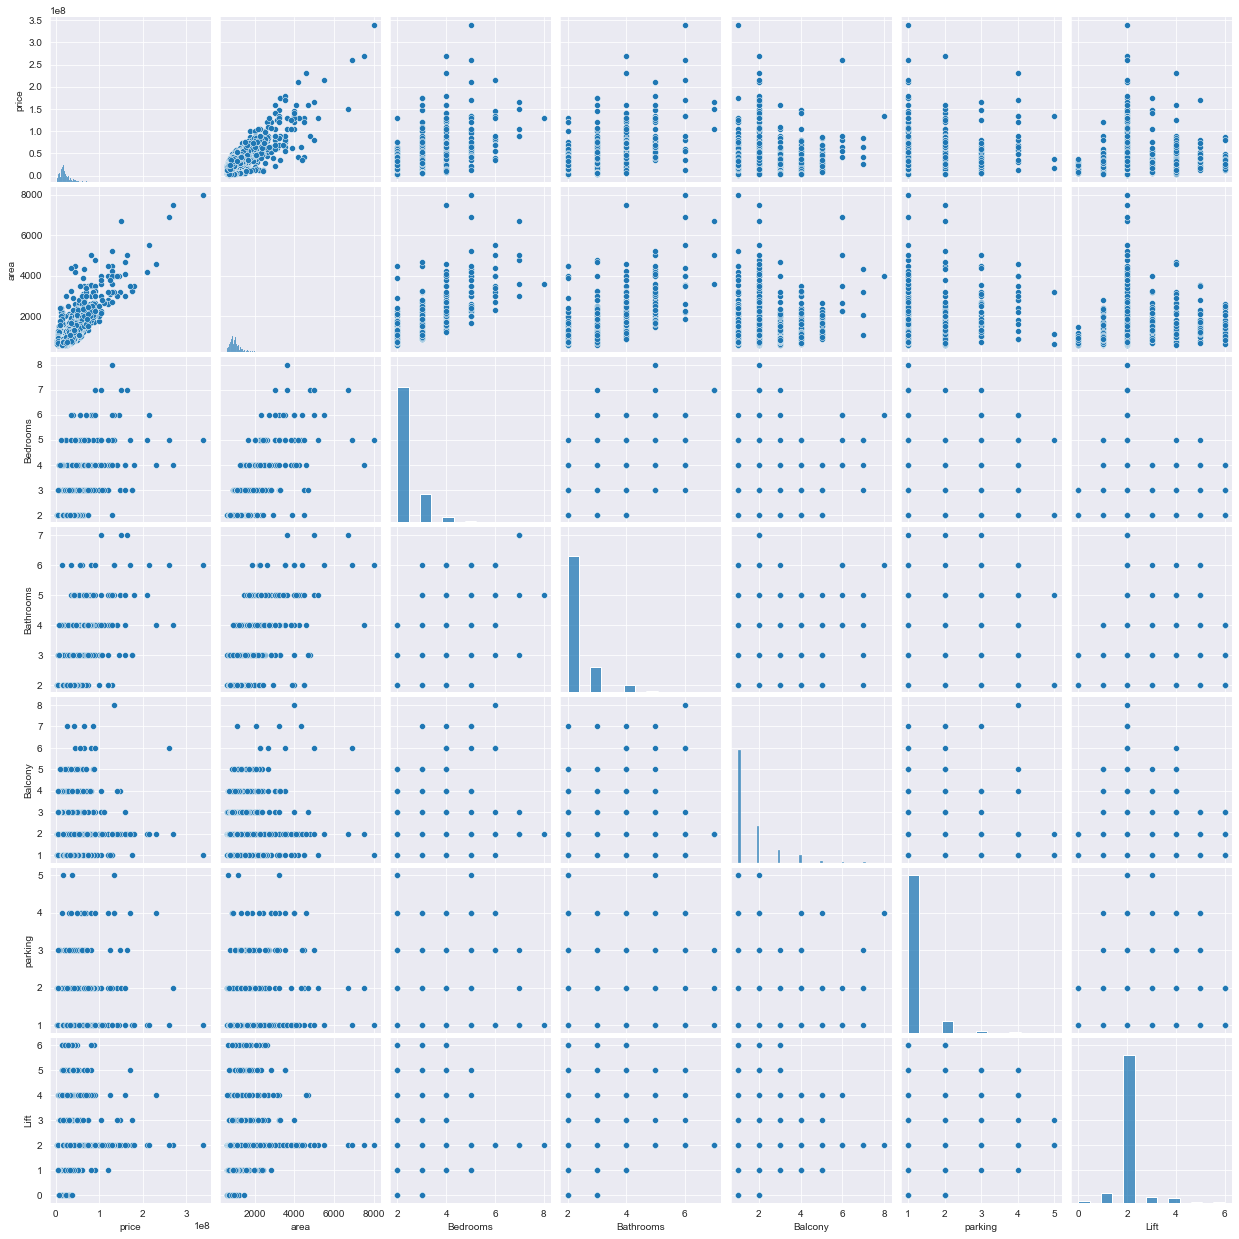

In [44]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df12)

#### One Hot Encoding For Categorial Columns

In [45]:
loc_dummies = pd.get_dummies(df12.Location)
loc_dummies.head(3)

,andheri,bandra,bhandup,bhayandar,borivali,chandivali,charkop,chembur,dadar,dahisar,...,thakur,thane,ulhasnagar,vasai,versova,vikhroli,vile,virar,wadala,worli
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
nro_dummies = pd.get_dummies(df12.neworold)
nro_dummies.head(3)

,New Property,Resale
0,0,1
1,0,1
2,0,1


In [47]:
fus_dummies = pd.get_dummies(df12.Furnished_status)
fus_dummies.head(3)

,Furnished,Semi Furnished,Unfurnished
0,1,0,0
1,1,0,0
2,0,0,1


In [48]:
tob_dummies = pd.get_dummies(df12.type_of_building)
tob_dummies.head(3)

,Flat,Individual House
0,1,0
1,1,0
2,1,0


Inference: Created Dummies Will Merge with original Data & remove one Dummy of each Variable to escape dummy variable trap

In [49]:
df13 = pd.concat([df12,nro_dummies,fus_dummies,tob_dummies,loc_dummies],axis='columns')
df13.head()

,price,area,Bedrooms,Bathrooms,Balcony,neworold,parking,Furnished_status,Lift,type_of_building,...,thakur,thane,ulhasnagar,vasai,versova,vikhroli,vile,virar,wadala,worli
0,23900000,950,2,2,1,Resale,1,Furnished,2,Flat,...,0,0,0,0,0,0,0,0,0,0
1,25000000,900,2,2,1,Resale,2,Furnished,2,Flat,...,0,0,0,0,0,0,0,0,0,0
2,34000000,1355,3,3,1,Resale,1,Unfurnished,3,Flat,...,0,0,0,0,0,0,0,0,0,0
3,55000000,1866,4,6,1,New Property,2,Unfurnished,3,Flat,...,0,0,0,0,0,0,0,0,0,0
5,33500000,1450,3,3,2,New Property,1,Semi Furnished,2,Flat,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#Final Dataset
final_df = df13.drop(['Location','neworold','Furnished_status','type_of_building'],axis="columns")
final_df.head()

,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift,New Property,Resale,Furnished,...,thakur,thane,ulhasnagar,vasai,versova,vikhroli,vile,virar,wadala,worli
0,23900000,950,2,2,1,1,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,25000000,900,2,2,1,2,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,34000000,1355,3,3,1,1,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,55000000,1866,4,6,1,2,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,33500000,1450,3,3,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Model Building

In [51]:
#Final Dataset Shape
final_df.shape

(3808, 59)

In [52]:
#Splitting X & Y Variable
# X Vaiable
X = final_df.drop(['price'], axis = 'columns')
# Y Variable
Y = final_df.price
#printing shape of both
print("X :",X.shape)
print("Y :",len(Y))

X : (3808, 58)
Y : 3808


In [53]:
# Train & Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

#### Linear model

In [54]:
#Model
Lmodel = LinearRegression()
Lmodel.fit(X_train,Y_train)
Lmodel.score(X_test,Y_test)*100

84.74486121790936

#### Model Validation - KFold


In [55]:
#Kfold of Linear model
kfold = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=kfold)

array([0.86041468, 0.87154877, 0.89254076, 0.85526314, 0.89645182])

Inference: We can see that in 5 iterations we get a score above 75% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

#### Find best Algorithms using GridSearchCV

In [56]:
#GridSearchCV

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' :{'model': LinearRegression(),'params':{'normalize': [True,False]}
        },
        'ridge': {'model': Ridge(),'params': { 'alpha': [0.1,0.5,1]}
        },
        'lasso': {'model': Lasso(),'params': {'alpha': [0.1,0.5,1],'selection': ['random', 'cyclic']}
        },
        'decision_tree': {'model': DecisionTreeRegressor(),'params': {'criterion' : ['mse','friedman_mse'],
                                                                      'splitter': ['best','random']}
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.848349,{'normalize': False}
1,ridge,0.848343,{'alpha': 0.1}
2,lasso,0.848349,"{'alpha': 0.1, 'selection': 'cyclic'}"
3,decision_tree,0.734327,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Inference: From this GridSearch it Seems Linear & Ridge_Regression has the Best Accuracy so our final model will be Ridge Regression model

In [57]:
#Lasso
La_model = Lasso(alpha = 0.1,selection='random')
La_model.fit(X_train, Y_train) 
La_model.score(X_test,Y_test)*100

84.74486212358352

#### Testing The Model on New Datapoint

In [58]:
# Function to Gets New input/Datapoint
def predict_price(area,Bedrooms,Bathrooms,Balcony,parking,Lift,neworold,Furnished_status,type_of_building,Location):    
    nro_index = np.where(X.columns==neworold)[0]
    fus_index = np.where(X.columns==Furnished_status)[0]
    tob_index = np.where(X.columns==type_of_building)[0]
    loc_index = np.where(X.columns==Location)[0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = Bedrooms
    x[2] = Bathrooms
    x[3] = Balcony
    x[4] = parking
    x[5] = Lift
    if nro_index >= 0:
        x[nro_index] = 1
    if fus_index >= 0:
        x[fus_index] = 1
    if [np.logical_and(tob_index > 0 , tob_index == 0)] :
        x[tob_index] = 1
    if loc_index >= 0:
        x[loc_index] = 1

    return round(La_model.predict([x])[0],2)

In [59]:
X.head(3)

,area,Bedrooms,Bathrooms,Balcony,parking,Lift,New Property,Resale,Furnished,Semi Furnished,...,thakur,thane,ulhasnagar,vasai,versova,vikhroli,vile,virar,wadala,worli
0,950,2,2,1,1,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,900,2,2,1,2,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1355,3,3,1,1,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
Y.head(3)

0    23900000
1    25000000
2    34000000
Name: price, dtype: int64

In [61]:
#0th
predict_price(950,2,2,1,1,2,'Resale','Furnished','Flat','andheri')

22217363.2

In [62]:
#4093th
predict_price(950,2,2,1,1,2,'Resale','Unfurnished','Flat','vikroli')

18920737.59

In [63]:
#New Dataspoint
predict_price(1450,3,3,2,1,2,'Resale','Unfurnished','Flat','mahim')

47083292.75

#### Saving the Trained Model

In [64]:
# .sav file
import pickle
filename = 'C:/Users/Akaash/Downloads/house_price_model.sav'
pickle.dump(La_model, open(filename, 'wb'))

In [65]:
# .pickle file
with open('C:/Users/Akaash/Downloads/house_prices_model.pickle','wb') as f:
    pickle.dump(La_model,f)

#### Exporting column information to a file that will be useful later on in our Deployment

In [66]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("C:/Users/Akaash/Downloads/columns.json","w") as f:
    f.write(json.dumps(columns))